**Assignment 8**
Develop a classification system using  GMM-UBM  for the  data  that  you have  used  in Assignment  6 and compare the  results  with  that  of  GMM classifier


In [ ]:
#Import recommonended libraries
import numpy as np
from sklearn.mixture import GaussianMixture as GMM
import copy

#Uncomment this if you want to display your [graphs] within the notebook in a proper format.
%matplotlib inline
#Uncomment this if you want to display your graphs in backend


import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
from numpy.random import randn
import glob
import sys
from PIL import Image  # To use this PILLOW package, pip install Pillow==2.2.2
from scipy.stats import norm, multivariate_normal
import warnings
warnings.filterwarnings('ignore')

In [2]:
class train_GMM:
    def returnGMM(features, NUMBER_OF_GAUSSIAN):
        gmm = GMM(n_components=NUMBER_OF_GAUSSIAN, covariance_type='diag')
        gmm.fit(features)
        return gmm
    
class opt:
    def normalize_meanvector(weight, var, mean_vec):
        normalize_mean = np.zeros(np.shape(mean_vec), dtype=np.float32)
        [NUMBER_OF_GAUSSIAN, FEATURE_ORDER] = np.shape(mean_vec)
        for ii in range(0, NUMBER_OF_GAUSSIAN):
            normalize_mean[ii, :] = np.sqrt(weight[ii]) * \
                            (1 / np.sqrt(var[ii, :])) * mean_vec[ii, :]
        return normalize_mean

Sample1 shape (50610, 3)
Sample2 shape (50400, 3)


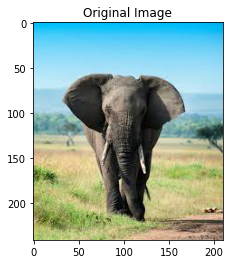

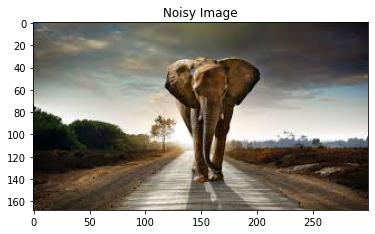

In [3]:
# ===========================
# parameters    
# ===========================

FEATURE_ORDER = 3
NUMBER_OF_GAUSSIAN = 4
RAND_VAL = 3
RAND_MEAN = 2
SCALING_FACTOR = 0.01



img = np.array(Image.open('elephant.jpeg'))

Data =img.reshape((-1,3));

img1 = np.array(Image.open('/content/elephant_1 (2).jpeg'))

Data1 =img1.reshape((-1,3));


# generating Data samples
sample1 = Data
sample2 = Data1


print("Sample1 shape", sample1.shape)
print("Sample2 shape", sample2.shape)


#Plot 2D
plt.imshow(sample1.reshape(img.shape))
plt.title('Original Image')
plt.show()


plt.imshow(sample2.reshape(img1.shape))
plt.title('Noisy Image')
plt.show()

In [4]:
# training init GMM to compuute UBM Model
GMM_train_by_sample1 = train_GMM.returnGMM(sample1, NUMBER_OF_GAUSSIAN)

##Posterior Probability of Noisy Dataset :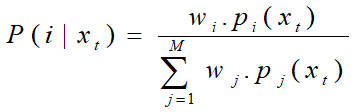

In [5]:
# Posterior probabilities for K NUMBER_OF_GAUSSIAN
probability = GMM_train_by_sample1.predict_proba(sample2)
print(probability.shape)

(50400, 4)


ni: 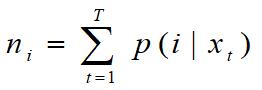

In [6]:
#N summation for K NUMBER_OF_GAUSSIAN
n_i = np.sum(probability, axis=0)
print(n_i)

[ 8715.46348004 18923.65549711  3106.28414301 19654.59687984]


Mean of Posterior Probaility on Noisy Image: 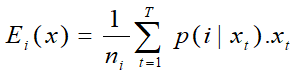

In [7]:
# (9)
E = np.zeros((FEATURE_ORDER, NUMBER_OF_GAUSSIAN), dtype=np.float32)
print('Size of E', E.shape)

for ii in range(0, NUMBER_OF_GAUSSIAN):
    probability_gauss = np.tile(probability[:, ii],(FEATURE_ORDER, 1)).T * sample2
    E[:, ii] = np.sum(probability_gauss, axis=0) / n_i[ii]

print('probability_gauss: ', probability_gauss.shape)
print('Size of E', E.shape)

Size of E (3, 4)
probability_gauss:  (50400, 3)
Size of E (3, 4)


Data dependent adaptation coefficient: 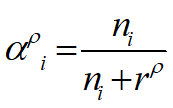

In [8]:
alpha = n_i / (n_i + SCALING_FACTOR)
print('alpha: ', alpha)

alpha:  [0.99999885 0.99999947 0.99999678 0.99999949]


In [9]:
old_mean = copy.deepcopy(GMM_train_by_sample1.means_)
print('old_mean: ', old_mean )
new_mean = np.zeros((NUMBER_OF_GAUSSIAN, FEATURE_ORDER), dtype=np.float32)
print('new mean: ', new_mean )

old_mean:  [[197.71577758 193.70653812 140.8587869 ]
 [ 36.96963359  37.80592768  33.41178001]
 [119.48803889 212.20832653 245.68811788]
 [130.08834376 138.35891624 109.00584916]]
new mean:  [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


Sufficient statistics Mean Updation: 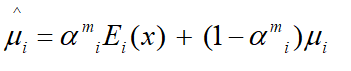

In [10]:
# (12)
for ii in range(0, NUMBER_OF_GAUSSIAN):
    new_mean[ii,:] = (alpha[ii] * E[:,ii]) + ((1 - alpha[ii]) * old_mean[ii, :])
print('new mean: ', new_mean )

new mean:  [[198.2944   196.03928  184.32022 ]
 [ 51.52933   41.437653  30.990152]
 [242.23186  240.39615  234.83652 ]
 [117.268745 112.26921   98.809845]]


In [11]:
# normalize
weight = GMM_train_by_sample1.weights_
var = GMM_train_by_sample1.covariances_
print('weight: ', weight )
print('var: ', var )

weight:  [0.31578914 0.15550643 0.31716599 0.21153843]
var:  [[ 445.63175432  213.78020582  528.56702312]
 [ 401.71349347  384.98429303  329.57440864]
 [3316.92251269  159.04401276   47.59117633]
 [ 696.65024562  899.81968459 1250.19979656]]


In [12]:
# get GMM supervector
norm_mean = opt.normalize_meanvector(weight, var, new_mean)
super_vector = np.reshape(norm_mean, NUMBER_OF_GAUSSIAN * FEATURE_ORDER)
print('norm_mean: ', norm_mean )
print('super_vector: ', super_vector )



norm_mean_old = opt.normalize_meanvector(weight, var,old_mean)
super_vector_old = np.reshape(norm_mean_old, NUMBER_OF_GAUSSIAN * FEATURE_ORDER)
print('norm_mean_old: ', norm_mean_old )
print('super_vector_old: ', super_vector_old )

norm_mean:  [[ 5.2786274  7.5345607  4.5052776]
 [ 1.0138425  0.8328136  0.6731644]
 [ 2.3686829 10.7352495 19.171041 ]
 [ 2.0434759  1.7213832  1.2853019]]
super_vector:  [ 5.2786274  7.5345607  4.5052776  1.0138425  0.8328136  0.6731644
  2.3686829 10.7352495 19.171041   2.0434759  1.7213832  1.2853019]
norm_mean_old:  [[ 5.263224    7.4449043   3.4429643 ]
 [ 0.7273796   0.75982326  0.7257667 ]
 [ 1.1684229   9.4764805  20.05692   ]
 [ 2.2668648   2.1214073   1.4179298 ]]
super_vector_old:  [ 5.263224    7.4449043   3.4429643   0.7273796   0.75982326  0.7257667
  1.1684229   9.4764805  20.05692     2.2668648   2.1214073   1.4179298 ]


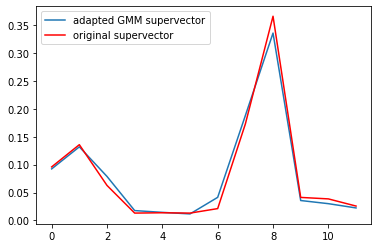

In [13]:
plt.figure()
plt.plot(super_vector / np.sum(np.abs(super_vector)))
plt.plot(super_vector_old / np.sum(np.abs(super_vector_old)), 'r')
plt.legend(['adapted GMM supervector', 'original supervector'])

testGMM_many_mean [[149.51453472 148.8667451  137.31730668]
 [ 99.18278222  91.11250657  76.78867385]
 [220.10971677 217.58095037 208.16544507]
 [ 46.80135512  36.76388547  26.64952389]]


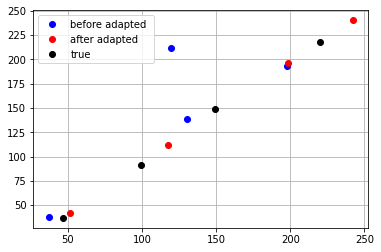

In [14]:
# ===========================
#Verification
# ===========================
sample2_many = sample2

testGMM_many = train_GMM.returnGMM(sample2_many, NUMBER_OF_GAUSSIAN) 
testGMM_many_mean = testGMM_many.means_
print('testGMM_many_mean', testGMM_many_mean)

plt.figure()
plt.plot(old_mean[:, 0], old_mean[:, 1], 'bo')
plt.plot(new_mean[:, 0], new_mean[:, 1], 'ro')
plt.plot(testGMM_many_mean[:, 0], testGMM_many_mean[:, 1], 'ko')
plt.legend(['before adapted ', 'after adapted', 'true'])
plt.grid(True)
plt.show()

[3 3 3 ... 0 0 0]


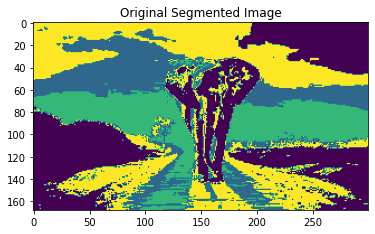

In [15]:
#Calculation Probability Function using GMM on Sample2

segmentation = train_GMM.returnGMM(sample2, NUMBER_OF_GAUSSIAN).predict(sample2)
print(segmentation)
final_segmented_image = segmentation.reshape(img1.shape[0],img1.shape[1]);
plt.imshow(final_segmented_image)
plt.title('Original Segmented Image')
plt.show()

[3 3 3 ... 1 1 1]


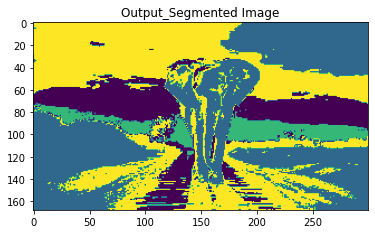

In [16]:
#Calculation Probability Function using UBM on Sample2

segmentation = GMM_train_by_sample1.predict(sample2)
print(segmentation)
final_segmented_image = segmentation.reshape(img1.shape[0],img1.shape[1]);
plt.imshow(final_segmented_image)
plt.title('Output_Segmented Image')
plt.show()

Posterior_probability: (50400, 4)
Labels/Classes: [3 3 3 ... 1 1 1]


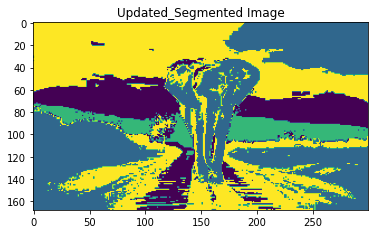

In [17]:
#Calculation Probability Function with Updated Mean values

post_proba = np.zeros((Data1.shape[0], NUMBER_OF_GAUSSIAN))

for c in range(NUMBER_OF_GAUSSIAN):
    post_proba [:,c] = weight[c] * multivariate_normal.pdf(Data1, new_mean[c,:], var[c])
print("Posterior_probability:", post_proba.shape)
labels  =  post_proba.argmax(1)
print("Labels/Classes:",labels)
final_segmented_image = labels.reshape(img1.shape[0],img1.shape[1]);
plt.imshow(final_segmented_image)
plt.title('Updated_Segmented Image')
plt.show()